In [1]:
import sys
sys.path.append('/home/zhw272/programming/pipeline_utility/in_development/Will')
from cell_extractor.AnnotationProximityTool import AnnotationProximityTool
from script import get_cell_detections
import pandas as pd
from collections import Counter

In [ ]:
finder = BorderFinder(animal)
detector = CellDetectorBase(animal,round = round,segmentation_threshold=threshold)
detections = detector.load_detections()
sure = detections[detections.predictions==2]
unsure = detections[detections.predictions==0]
sure.rename(columns = {'x' : 'col', 'y' : 'row'}, inplace = True)
unsure.rename(columns = {'x' : 'col', 'y' : 'row'}, inplace = True)
_,sure = finder.find_border_cells(sure)
_,unsure = finder.find_border_cells(unsure)
if sample is not None:
    sure_data_sample = sure[['col','row','section']].sample(sample).sort_values('section').to_numpy().tolist()
else:
    sure_data_sample = sure[['col','row','section']].sort_values('section').to_numpy().tolist()
sure_data = sure[['col','row','section']].sort_values('section').to_numpy().tolist()
unsure_data = unsure[['col','row','section']].sort_values('section').to_numpy().tolist()
sure_cells_sample = numpy_to_json(sure_data_sample,category = f'Round{round+1}_Sure')
sure_cells = numpy_to_json(sure_data,category = f'Round{round+1}_Sure')
unsure_cells = numpy_to_json(unsure_data,color_hex='#1d66db',category = f'Round{round+1}_Unsure')

sc_id = create_QC_url(animal,sure_cells_sample,unsure_cells,f'Julian QC{round+1} '+animal)
# false_negative_id = create_QC_url(animal,sure_cells,unsure_cells,'Julian false negative '+animal)
print(f'Julian QC url id {animal} : https://activebrainatlas.ucsd.edu/ng/?id={sc_id}')
# print(f'Julian false negative url id {animal} : https://activebrainatlas.ucsd.edu/ng/?id={false_negative_id}')

sc_id = create_QC_url(animal,sure_cells_sample,unsure_cells,f'Marissa QC{round+1} '+animal)
# false_negative_id = create_QC_url(animal,sure_cells,unsure_cells,'Marissa false negative '+animal)
print(f'Marissa QC url {animal} : https://activebrainatlas.ucsd.edu/ng/?id={sc_id}')
# print(f'Marissa false negative url id {animal} : https://activebrainatlas.ucsd.edu/ng/?id={false_negative_id}')


In [ ]:
finder = BorderFinder(animal)
detector = CellDetectorBase(animal,round = round,segmentation_threshold=threshold)
detections = detector.load_detections()
sure = detections[detections.predictions==2]
unsure = detections[detections.predictions==0]

In [2]:
cell_detections = get_cell_detections()
for key in cell_detections:
    print(f'{key} has {len(cell_detections[key])} cells')

dbround2_machine_sure has 12507 cells
dbround2_machine_unsure has 511 cells
original_human_positive has 1910 cells
round1_human_negative has 351 cells
round1_human_positive has 883 cells
round1_machine_sure has 12224 cells
round1_machine_unsure has 1420 cells
round2_machine_sure has 13067 cells
round2_machine_unsure has 1726 cells
round2multi_machine_sure has 14188 cells
round2multi_machine_unsure has 2064 cells


In [3]:
annotations_to_prepare = pd.concat([cell_detections[key] for key in ['round1_human_negative','original_human_positive','round1_machine_sure','round1_machine_unsure']])
tool = AnnotationProximityTool()
tool.pair_distance=5
tool.set_annotations_to_compare(annotations_to_prepare)
tool.find_equivalent_points()
Counter([tuple(i) for i in tool.pair_categories.values()]).most_common()

calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 15905
after removing duplicates 14808


[(('machine_sure',), 11480),
 (('human_positive',), 1164),
 (('machine_unsure',), 1076),
 (('human_positive', 'machine_sure'), 680),
 (('human_negative', 'machine_unsure'), 278),
 (('human_negative', 'machine_sure'), 62),
 (('human_positive', 'machine_unsure'), 57),
 (('human_negative', 'human_positive', 'machine_unsure'), 7),
 (('human_negative', 'human_positive', 'machine_sure'), 2),
 (('human_negative', 'machine_unsure', 'machine_unsure'), 1),
 (('human_negative',), 1)]

In [4]:
annotations_to_prepare = pd.concat([cell_detections[key] for key in ['round1_human_negative','round1_human_positive','round1_machine_sure','round1_machine_unsure']])
tool = AnnotationProximityTool()
tool.pair_distance=5
tool.set_annotations_to_compare(annotations_to_prepare)
tool.find_equivalent_points()
Counter([tuple(i) for i in tool.pair_categories.values()]).most_common()

calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 14878
after removing duplicates 14028


[(('machine_sure',), 12155),
 (('machine_unsure',), 640),
 (('human_positive', 'machine_unsure'), 493),
 (('human_positive',), 384),
 (('human_negative', 'machine_unsure'), 284),
 (('human_negative', 'machine_sure'), 64),
 (('human_positive', 'machine_sure'), 5),
 (('human_negative', 'machine_unsure', 'machine_unsure'), 1),
 (('human_negative',), 1),
 (('human_negative', 'human_positive', 'machine_unsure'), 1)]

In [5]:
annotations_to_prepare = pd.concat([cell_detections[key] for key in ['round1_human_negative','round1_human_positive','dbround2_machine_sure','dbround2_machine_unsure']])
tool = AnnotationProximityTool()
tool.pair_distance=5
tool.set_annotations_to_compare(annotations_to_prepare)
tool.find_equivalent_points()
Counter([tuple(i) for i in tool.pair_categories.values()]).most_common()

calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 14252
after removing duplicates 13635


[(('machine_sure',), 12117),
 (('human_positive',), 392),
 (('human_positive', 'machine_sure'), 369),
 (('machine_unsure',), 285),
 (('human_negative',), 226),
 (('human_positive', 'machine_unsure'), 120),
 (('human_negative', 'machine_unsure'), 105),
 (('human_negative', 'machine_sure'), 19),
 (('human_negative', 'human_positive', 'machine_unsure'), 1),
 (('human_positive', 'machine_sure', 'machine_sure'), 1)]

In [6]:
annotations_to_prepare = pd.concat([cell_detections[key] for key in ['round1_human_negative','round1_human_positive','round2multi_machine_sure','round2multi_machine_unsure']])
tool = AnnotationProximityTool()
tool.pair_distance=5
tool.set_annotations_to_compare(annotations_to_prepare)
tool.find_equivalent_points()
Counter([tuple(i) for i in tool.pair_categories.values()]).most_common()

calculating distance matrix
finding points that are close to each other
grouping and labeling points that are close to each other
before removing duplicates 17486
after removing duplicates 16689


[(('machine_sure',), 13596),
 (('machine_unsure',), 1826),
 (('human_positive', 'machine_sure'), 474),
 (('human_positive',), 377),
 (('human_negative', 'machine_unsure'), 191),
 (('human_negative',), 121),
 (('human_negative', 'machine_sure'), 38),
 (('human_positive', 'machine_unsure'), 31),
 (('machine_sure', 'machine_sure'), 12),
 (('machine_sure', 'machine_sure', 'machine_sure'), 11),
 (('machine_unsure', 'machine_unsure'), 5),
 (('machine_sure', 'machine_sure', 'machine_sure', 'machine_sure'), 2),
 (('machine_unsure', 'machine_unsure', 'machine_unsure'), 2),
 (('human_negative', 'human_positive', 'machine_sure'), 1),
 (('machine_sure',
   'machine_sure',
   'machine_sure',
   'machine_sure',
   'machine_sure',
   'machine_sure'),
  1),
 (('machine_sure',
   'machine_sure',
   'machine_sure',
   'machine_sure',
   'machine_sure',
   'machine_sure',
   'machine_sure'),
  1)]

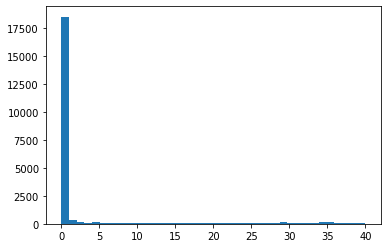

In [7]:
tool.plot_distance_distribution(lower=0,upper=40)